# 02. Neural Network Classification with TensorFlow

Okay, we've seen how to deal with a regression problem in TensorFlow, let's look at how we can approach a classification problem.

A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting whether something is one thing or another.

For example, you might want to:
* Predict whether or not someone has heart disease based on their health parameters. This is called **binary classification** since there are only two options.
* Decide whether a photo of is of food, a person or a dog. This is called **multi-class classification** since there are more than two options.
* Predict what categories should be assigned to a Wikipedia article. This is called **multi-label classification** since a single article could have more than one category assigned.

In this notebook, we're going to work through a number of different classification problems with TensorFlow. In other words, taking a set of inputs and predicting what class those set of inputs belong to.

## What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:
- Architecture of a classification model
- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs)
    - "What class do the inputs belong to?"
- Creating custom data to view and fit
- Steps in modelling for binary and mutliclass classification
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
      - Finding the best learning rate
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
  - Improving a model
- The power of non-linearity
- Evaluating classification models
  - Visualizng the model ("visualize, visualize, visualize")
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)


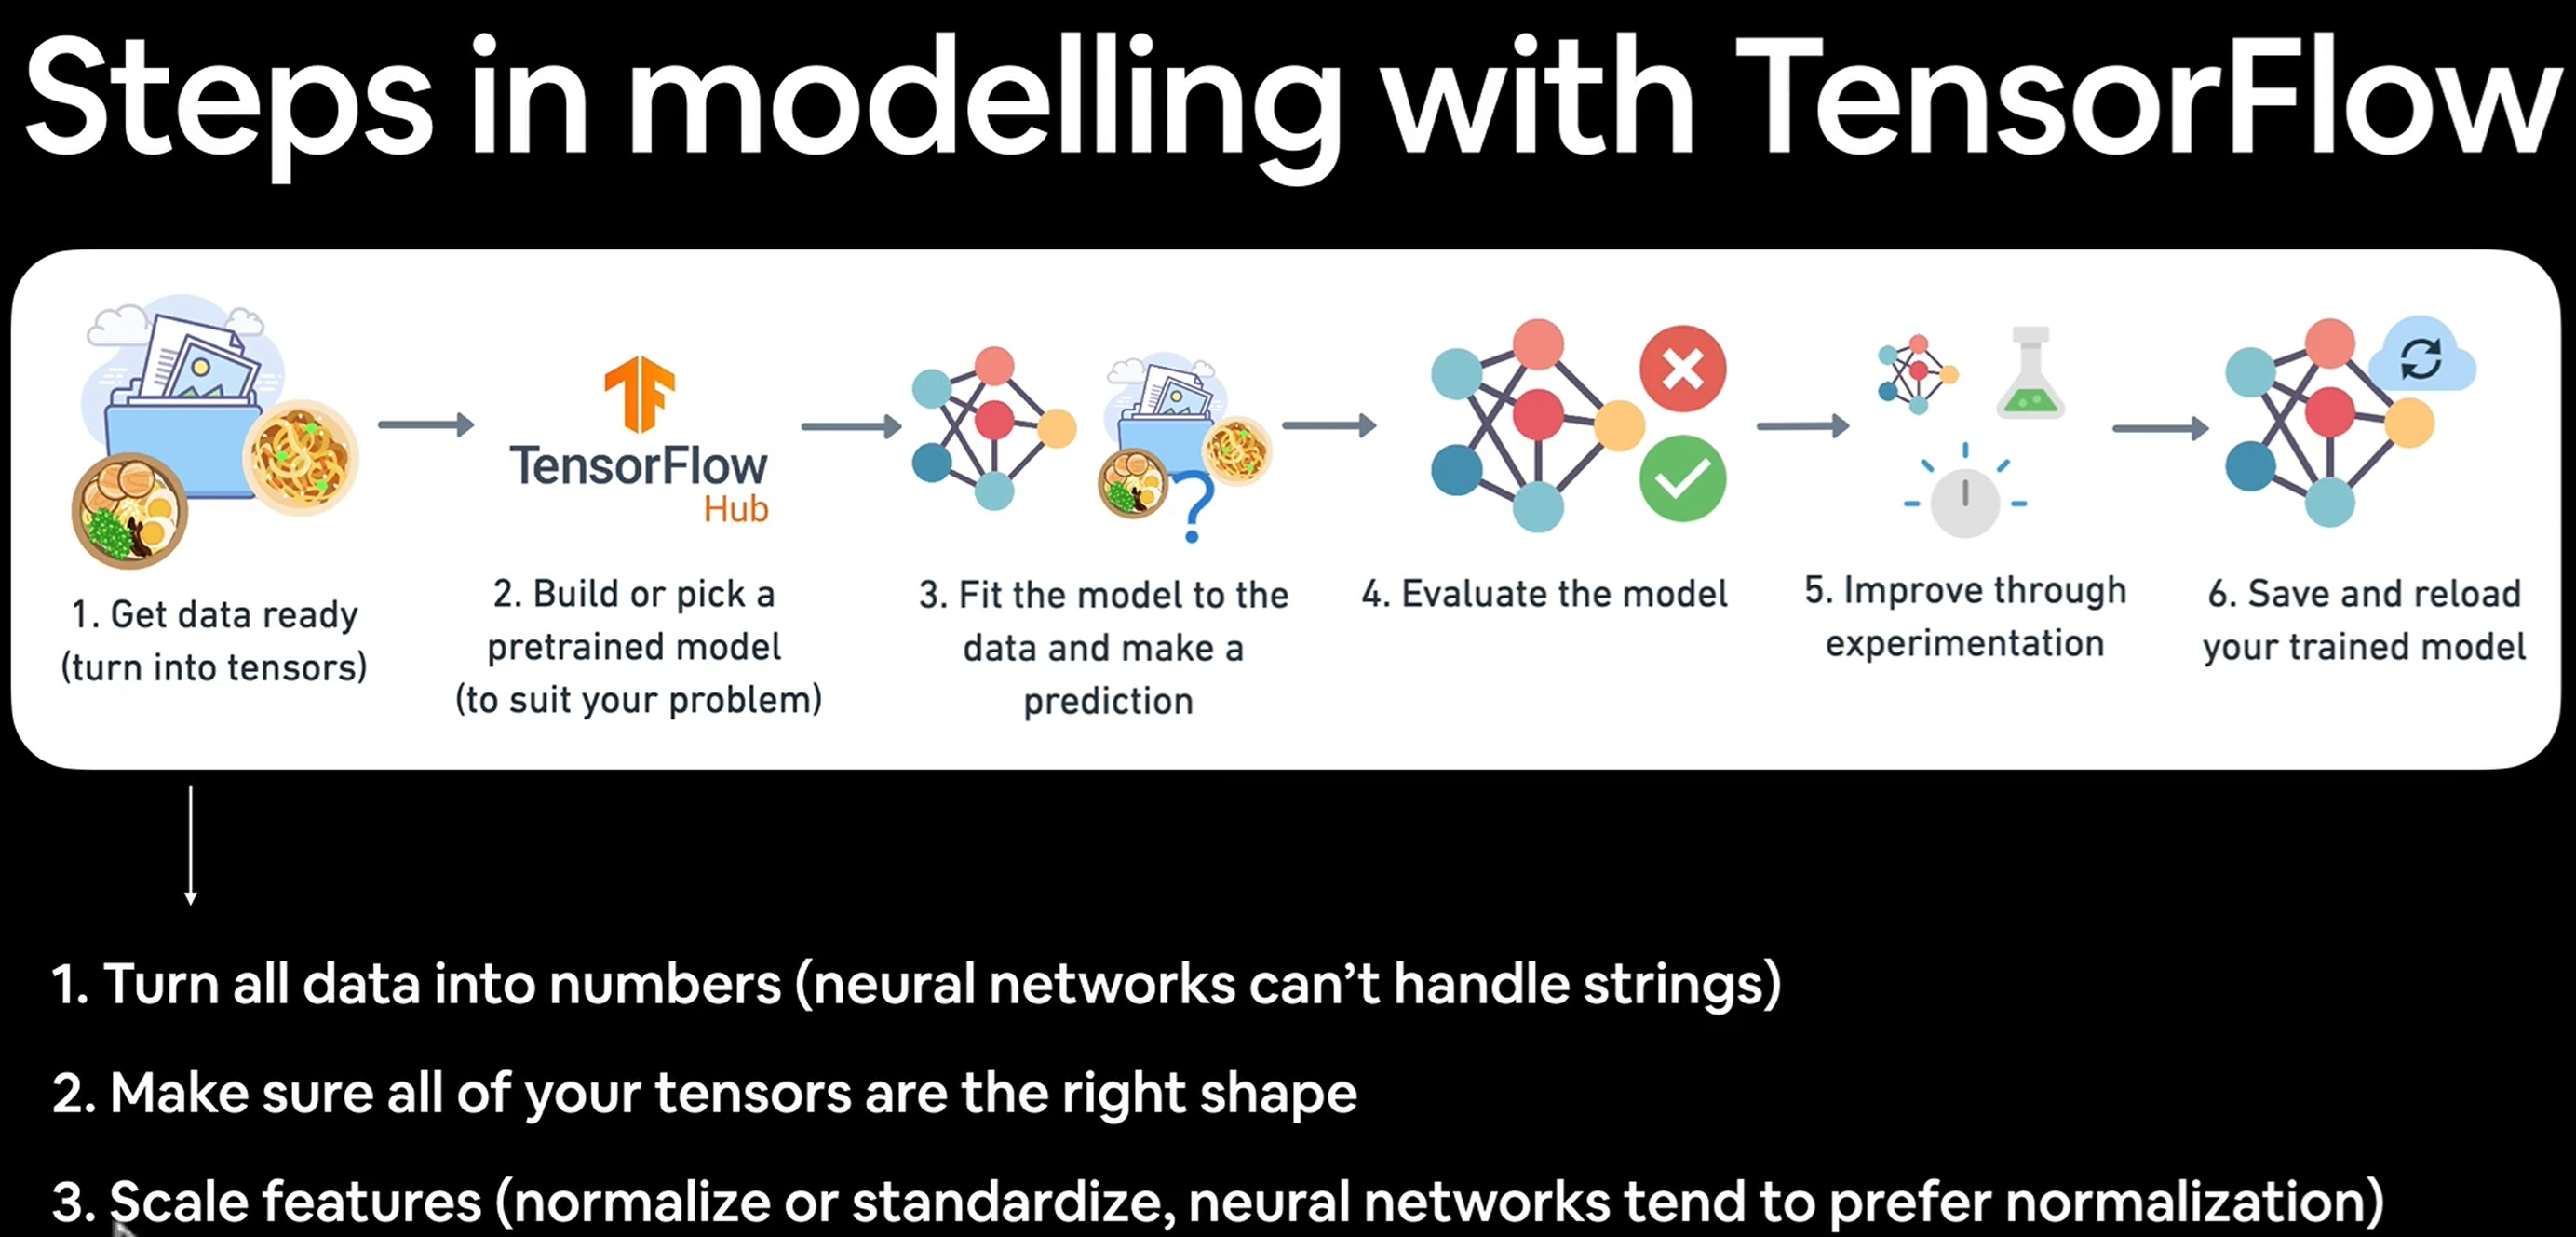

## Typical architecture of a classification neural network

The word *typical* is on purpose.

Because the architecture of a classification neural network can widely vary depending on the problem you're working on.

However, there are some fundamentals all deep neural networks contain:
* An input layer.
* Some hidden layers.
* An output layer.

Much of the rest is up to the data analyst creating the model.

The following are some standard values you'll often use in your classification neural networks.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

Table 1: Typical architecture of a classification network. Source: Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)


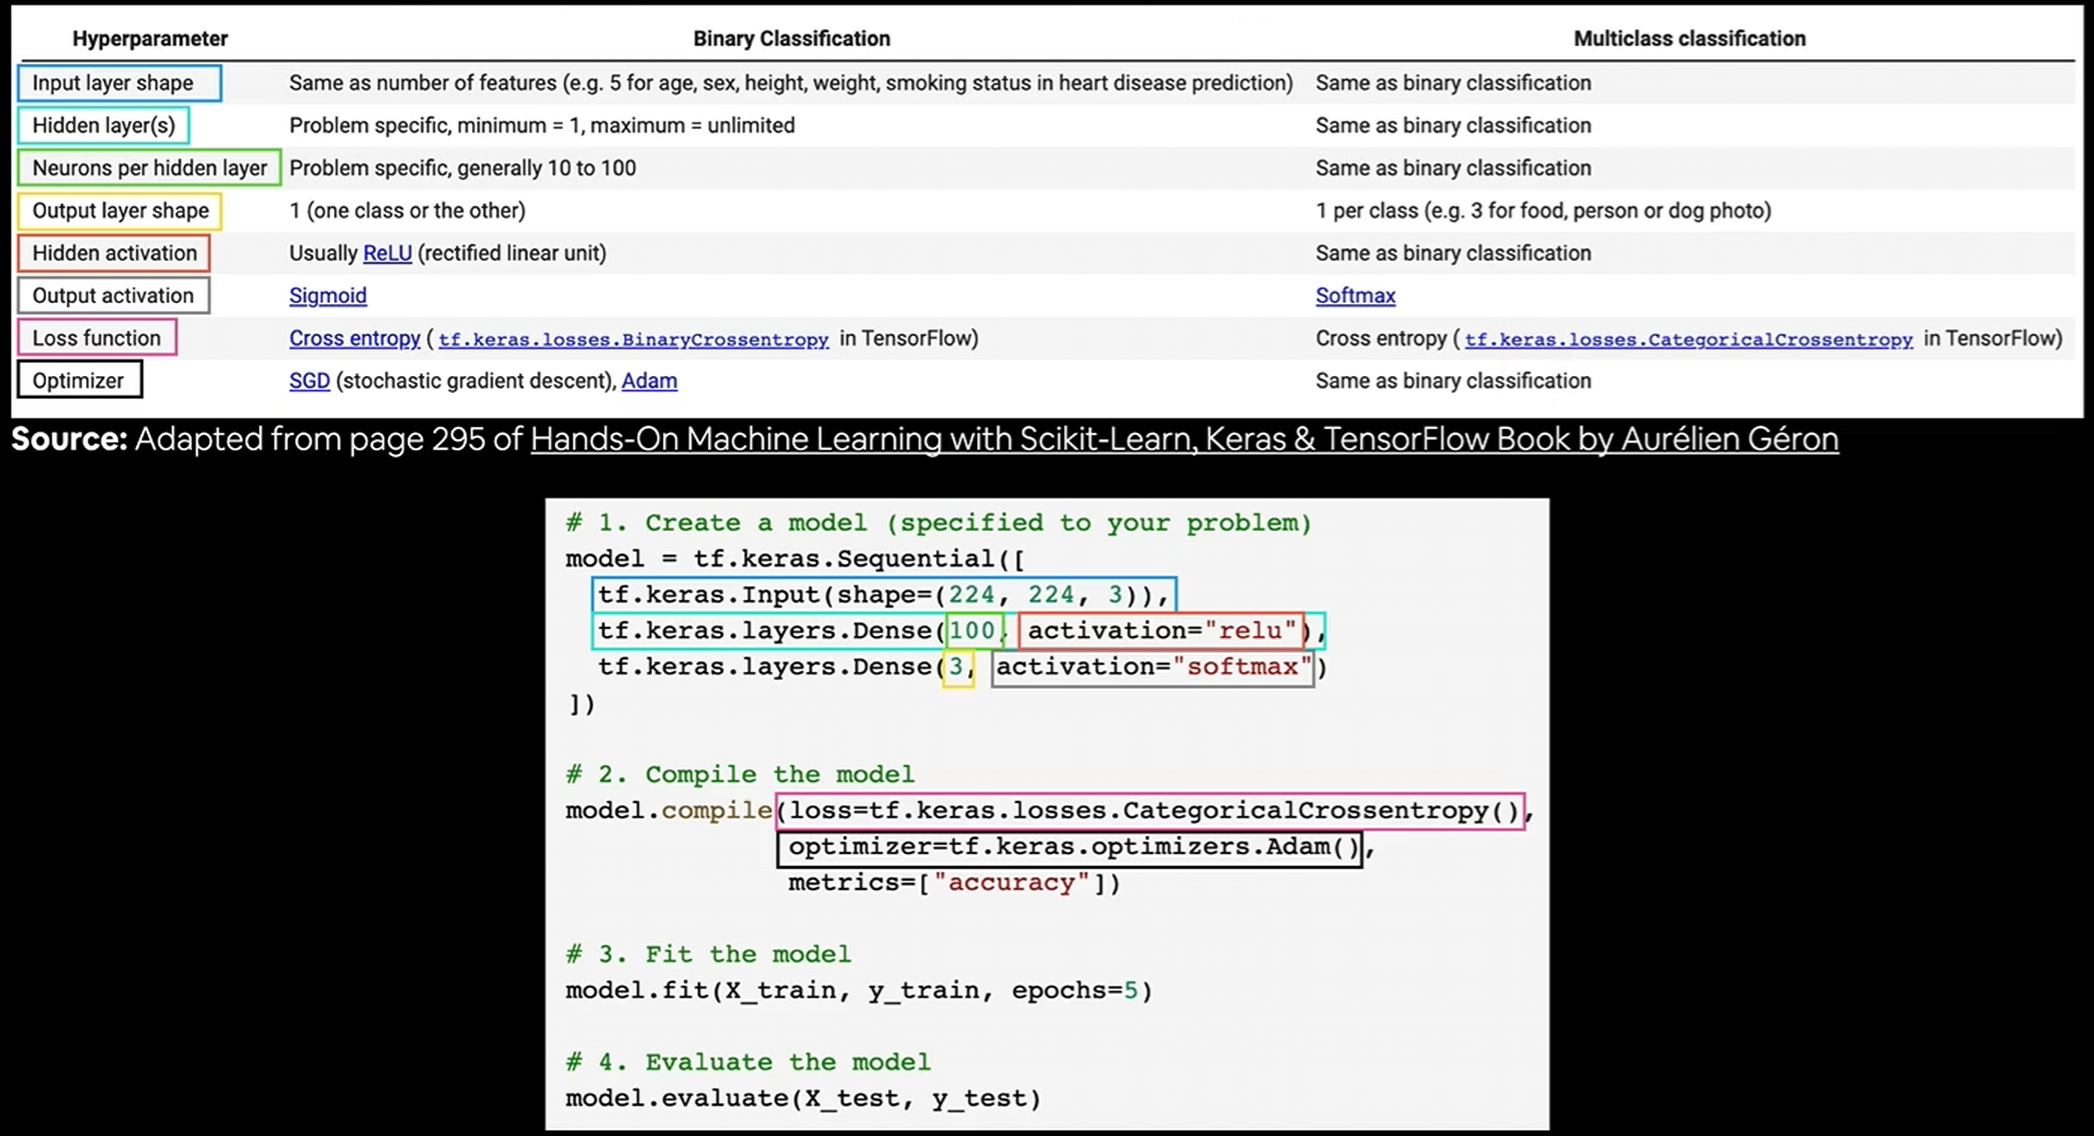

## Creating data to view and fit

### Creating sample circle data

In [69]:
from sklearn.datasets import make_circles

# Make 1000 examples
n = 1000

# Create circles
X, y = make_circles(n_samples=n, noise=0.05, random_state=42)

In [70]:
# Check out the features
print(X[:5])

[[ 0.74220688  0.24668576]
 [-0.7340323   0.16869164]
 [-0.82985872  0.22195899]
 [-0.42913559  0.67223019]
 [ 0.44560223 -0.89493556]]


In [71]:
# Check out the labels
print(y[:5])

[1 1 1 1 0]


### Visualize our circle data

Our data is a littlt bit hard to understand, let's visualize it!

In [72]:
import pandas as pd

circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles.head()

X0        X1  label
0  0.742207  0.246686      1
1 -0.734032  0.168692      1
2 -0.829859  0.221959      1
3 -0.429136  0.672230      1
4  0.445602 -0.894936      0

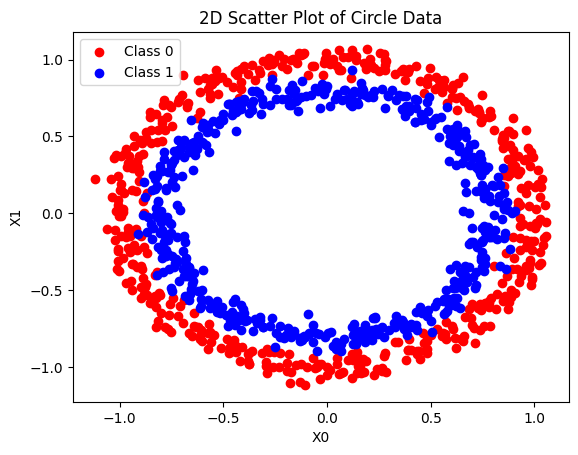

"\nThe data is not linearly separable, meaning we can't draw a straight line to separate the two classes.\nThis is where neural networks come in handy.\n\nLabel 0: Points that are inside the inner circle.\nLabel 1: Points that are outside the inner circle but within the outer circle.\n"

In [73]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(circles[circles['label'] == 0]['X0'], circles[circles['label'] == 0]['X1'], color='red', label='Class 0')
plt.scatter(circles[circles['label'] == 1]['X0'], circles[circles['label'] == 1]['X1'], color='blue', label='Class 1')
plt.xlabel('X0')
plt.ylabel('X1')
plt.legend()
plt.title('2D Scatter Plot of Circle Data')
plt.show()

# * Note: 
"""
The data is not linearly separable, meaning we can't draw a straight line to separate the two classes.
This is where neural networks come in handy.

Label 0: Points that are inside the inner circle.
Label 1: Points that are outside the inner circle but within the outer circle.
"""


In [74]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [75]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [76]:
# View the first example of features and labels
X[0], y[0]

(array([0.74220688, 0.24668576]), 1)

## Build our classification models

In [77]:
import tensorflow as tf

In [78]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=10)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4695 - loss: 4.7956
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4796 - loss: 3.3038
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4998 - loss: 0.7565
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4991 - loss: 0.7097
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5027 - loss: 0.6985
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4943 - loss: 0.6954
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4782 - loss: 0.6946
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4862 - loss: 0.6945 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4639 - loss: 0.6946
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4563 - loss: 0.6947


In [79]:
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4629 - loss: 0.6927


[0.6932638883590698, 0.45899999141693115]

## Improving our model

Looking at the accuracy metric, our model performs poorly (50% accuracy on a binary classification problem is the equivalent of guessing), but what if we trained it for longer?

In [80]:
# Try to improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)

In [81]:
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4875 - loss: 0.6928


[0.693287193775177, 0.4729999899864197]

Even after 200 passes of the data, it's still performing as if it's guessing.

What if we added an extra layer and trained for a little longer?

In [82]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API but with an extra layer
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1), # add another layer
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)


# Evaluate the model
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4134 - loss: 0.6930


[0.6932182908058167, 0.4169999957084656]

Still not even as good as guessing (~50% accuracy)

Let's remind ourselves of a couple more ways we can use to improve our models.

### Adding layers and increase the number of hidden units

In [83]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API but with an extra layer
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

# Evaluate the model
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5165 - loss: 0.6915


[0.6944504380226135, 0.49399998784065247]

Performance is still really poor.

Let's make some visualizations to see what's happening.

Note: When model is performing strangely or there's something going on with the data we are not quite sure of, remember to **visualize visualize visualize**. Inspect your data, inspect your model, inspect your model's predictions.

### Visualize the model's predictions

We are going to create a function plot_decision_boundary() which:
- Takes in a trained model, features(`X`) and labels(`y`).
- Create a [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) of the different `X` values.
- Makes predictions across the meshgrid.
- Plots the predictions as well as a line between the fifferent zones (where each unique class falls).

In [84]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/Made-With-ML
    """

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if model.output_shape[-1] > 1: # if there's more than 1 output, we'll assume it's multi-class
        print("doing multiclass classification...")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape) 
    else:
        print("doing binary classification...")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
doing binary classification...


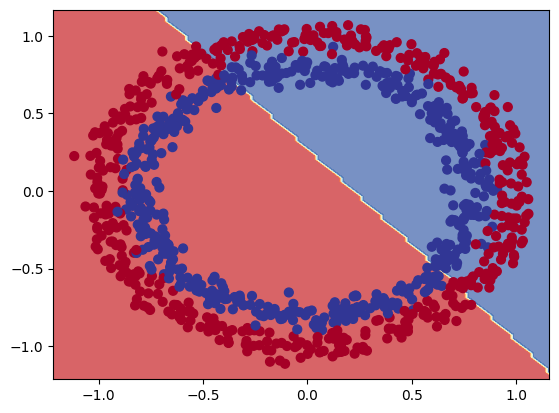

In [85]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

### Testing our model in regression problem

In [86]:
# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split our regression data into training and test sets
split_size = int(0.8 * len(X_regression)) # 80% train, 20% test
X_reg_train, y_reg_train = X_regression[:split_size], y_regression[:split_size]
X_reg_test, y_reg_test = X_regression[split_size:], y_regression[split_size:]

# Check the lengths
len(X_reg_train), len(X_reg_test), len(y_reg_train), len(y_reg_test)

(160, 40, 160, 40)

In [87]:
# Recreate the model for regression problem

# Set random seed
tf.random.set_seed(42)

# 1. Create the model with same architecture as model_3
model_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_reg.compile(loss=tf.keras.losses.mae, # change the loss function to mean absolute error
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metrics to mean absolute error

# 3. Fit the model
model_reg.fit(tf.expand_dims(X_reg_train, axis=1), y_reg_train, epochs=100, verbose=0)

# Evaluate the model
model_reg.evaluate(X_regression, y_regression)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 49.8347 - mae: 49.8347


[40.434295654296875, 40.434295654296875]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


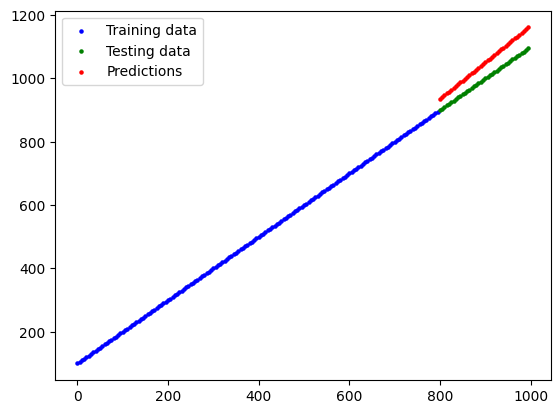

In [88]:
# Make predictions with the regression model
y_reg_preds = model_reg.predict(tf.expand_dims(X_reg_test, axis=1))

# Plot the model's predictions against the regression data
plt.scatter(X_reg_train, y_reg_train, color='b', label='Training data', s=5)
plt.scatter(X_reg_test, y_reg_test, color='g', label='Testing data', s=5)
plt.scatter(X_reg_test, y_reg_preds, color='r', label='Predictions', s=5)
plt.legend()

# The predictions looks better than complete guessing, so this means our model must be learning something.
# There must be something we are missing our on for our classification model.

### The missing piece: Non-linearity

Okay, so we saw our neural network can model straight lines (with ability a little bit better than guessing).

What about non-straight (non-linear) lines?

If we're going to model our classification data (the red and blue circles), we're going to need some non-linear lines.

> 🔨 **Practice:** Before we get to the next steps, I'd encourage you to play around with the [TensorFlow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=1&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.09561&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularizationRate_hide=true&discretize_hide=true&regularization_hide=true&dataset_hide=true&noise_hide=true&batchSize_hide=true) (check out what the data has in common with our own classification data) for 10-minutes. In particular the tab which says "activation". Once you're done, come back.

![simple neural net created with TensorFlow playground](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-simple-net-linear-activation.png)

In [89]:
# Let's recreate the basic setting in TensorFlow Playground
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
model_4.fit(X, y, epochs=100, verbose=0)

# Evaluate the model
model_4.evaluate(X, y)

# Our model performs like guessing in the basic setting.

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4442 - loss: 0.6980


[0.6990577578544617, 0.4480000138282776]

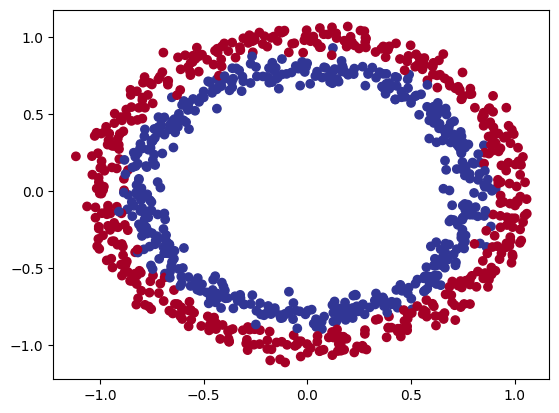

In [90]:
# Check out our data again
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification...


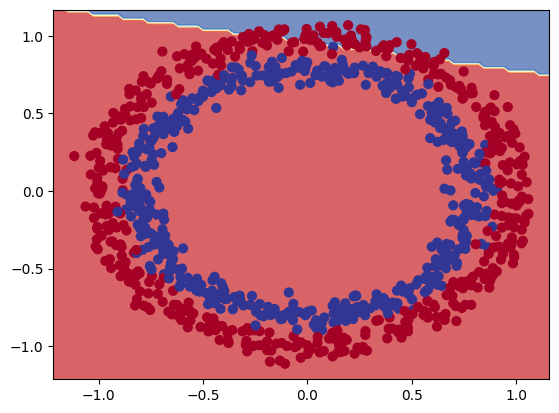

In [91]:
# And let's see how our model is making predictions on it.
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)

### Trying `ReLU` activation for non-linear data

ReLU: Rectified Linear Unit

In [92]:
# Set random seed
tf.random.set_seed(42)

# Create the model with ReLU activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # change the activation function to ReLU
    tf.keras.layers.Dense(1) 
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
model_5.fit(X, y, epochs=100, verbose=0)

# Evaluate the model
model_5.evaluate(X, y)

# Still worse than guessing, let try to add more layers

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4955 - loss: 8.1322 


[8.059046745300293, 0.5]

In [93]:
# Add more layers for our ReLU model
# Set random seed
tf.random.set_seed(42)

# Create the model with ReLU activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # add more neurons and layers
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1) 
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
model_6.fit(X, y, epochs=100, verbose=0)

# Evaluate the model
model_6.evaluate(X, y)

# Much better! Our model is learning something now.

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7834 - loss: 0.5141


[0.5041369795799255, 0.7910000085830688]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification...


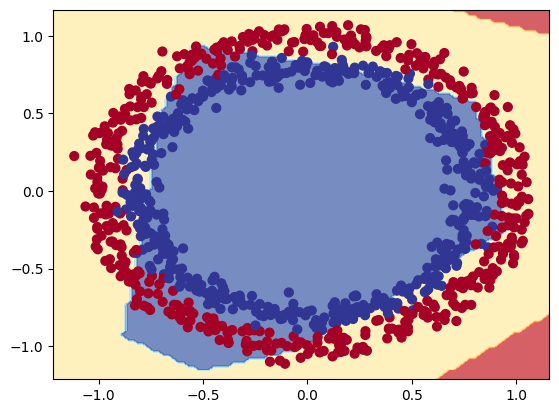

In [94]:
# Checkout the decision boundary
plot_decision_boundary(model_6, X, y)

# Looks like we still have room for improvement

### Adding Sigmoid activation output layer and longer training

This time we'll change the activation function on our output layer too. Remember the architecture of a classification model? For binary classification, the output layer activation is usually the [Sigmoid activation function](https://www.tensorflow.org/api_docs/python/tf/math/sigmoid).

In [95]:
# Set random seed
tf.random.set_seed(42)

# Create the model with ReLU activation and sigmoid output
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # change the output activation to sigmoid
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
model_7.fit(X, y, epochs=200, verbose=0) # train for longer

# Evaluate the model
model_7.evaluate(X, y)

# It reach over 95% accuracy, which is pretty good.

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9493 - loss: 0.2108


[0.20738421380519867, 0.9490000009536743]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification...


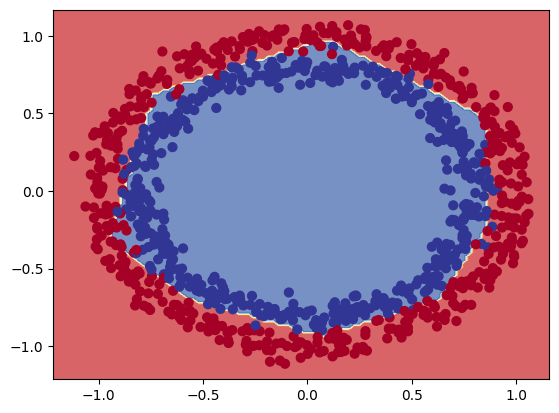

In [96]:
# Checkout the decision boundary
plot_decision_boundary(model_7, X, y)

Nice! It looks like our model is almost perfectly (apart from a few examples) separating the two circles.

> 🤔 **Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

Before we answer that, it's important to recognize what we've just covered.

> 🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Think of it like this:

If I gave you an unlimited amount of straight lines and non-straight lines, what kind of patterns could you draw?

We've been using a linear function or a non-linear function the whole time.

They're what power the layers in the models we just built.

To get some intuition about the activation functions we've just used, let's create them and then try them on some toy data.

## Experimenting Linear and Non-Linear with toy tensors

In [97]:
# Create a toy tensor (similar to the data we have been working with)
toy_tensor = tf.cast(tf.range(-10, 10), tf.float32)
toy_tensor

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

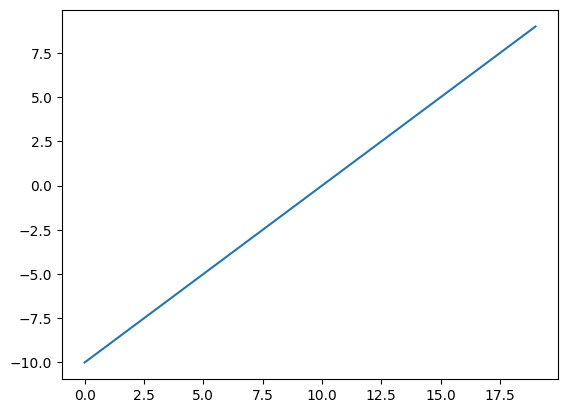

In [98]:
# Visualize the toy tensor
plt.plot(toy_tensor)

A straight (linear) line!

Nice, now let's recreate the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) and see what it does to our data. You can also find a pre-built sigmoid function at [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid).

In [99]:
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

sigmoid_toy_tensor = sigmoid(toy_tensor)
sigmoid_toy_tensor

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

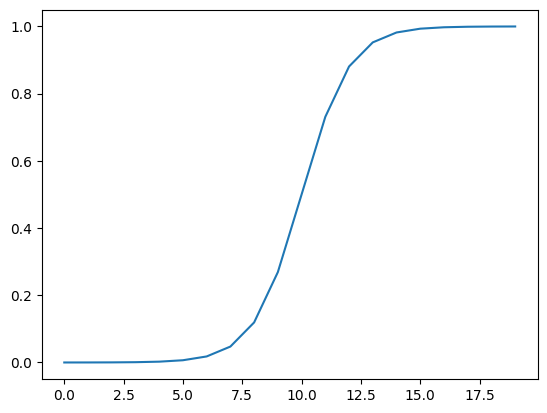

In [100]:
# Plot the toy tensor transformed by the sigmoid function
plt.plot(sigmoid_toy_tensor)

A non-straight (non-linear) line!

Okay, how about the [ReLU function](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/#:~:text=The%20rectified%20linear%20activation%20function,otherwise%2C%20it%20will%20output%20zero.) (ReLU turns all negatives to 0 and positive numbers stay the same)?

In [101]:
def relu(x):
    return tf.maximum(0, x)

relu_toy_tensor = relu(toy_tensor)
relu_toy_tensor

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

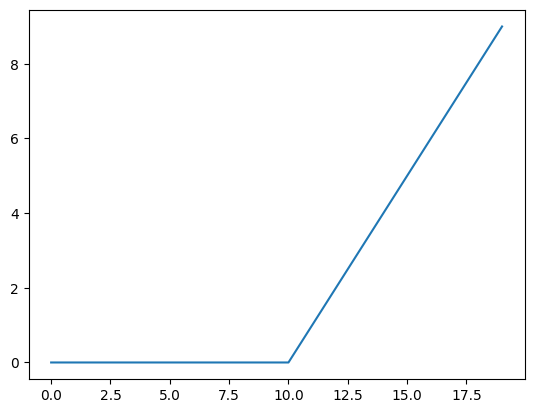

In [102]:
# Plot the toy tensor transformed by the ReLU function
plt.plot(relu_toy_tensor)

Another non-straight line!

Well, how about TensorFlow's [linear activation function](https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear)?

In [103]:
linear_toy_tensor = tf.keras.activations.linear(toy_tensor)
linear_toy_tensor

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [104]:
# The linear activation function doesn't change the input tensor
toy_tensor == linear_toy_tensor

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

Okay, so it makes sense now the model doesn't really learn anything when using only linear activation functions, because the linear activation function doesn't change our input data in anyway.

Where as, with our non-linear functions, our data gets manipulated. A neural network uses these kind of transformations at a large scale to figure draw patterns between its inputs and outputs.

> 📖  **Resource:** For more on activation functions, check out the [machine learning cheatsheet page](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#) on them.

## Evaluating and improving our classification model

If you answered the question above, you might've picked up what we've been doing wrong.

We've been evaluating our model on the same data it was trained on.

A better approach would be to split our data into training, validation (optional) and test sets.

Once we've done that, we'll train our model on the training set (let it find patterns in the data) and then see how well it learned the patterns by using it to predict values on the test set.

Let's do it.

In [105]:
# What's the size of the dataset?
len(X)

1000

In [106]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [107]:
# Recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # changed the learning rate from 0.001 to 0.01
                metrics=['accuracy'])

# Fit the model
model_8_fit_history = model_8.fit(X_train, y_train, epochs=25) # testing with only 25 steps for our new model

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4562 - loss: 0.7038 
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4775 - loss: 0.6912
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5432 - loss: 0.6882 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5306 - loss: 0.6848
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5817 - loss: 0.6793
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5886 - loss: 0.6717
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5921 - loss: 0.6632
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6032 - loss: 0.6531 
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6213 - loss: 0.6447 
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6275 - loss: 0.6367 
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6332 - loss: 0.6278 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.646

In [108]:
# Evaluate the model
model_7.evaluate(X, y)

# The performance was great (over 90% accuracy) for only 25 epochs

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9493 - loss: 0.2108 


[0.20738421380519867, 0.9490000009536743]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step
doing binary classification...


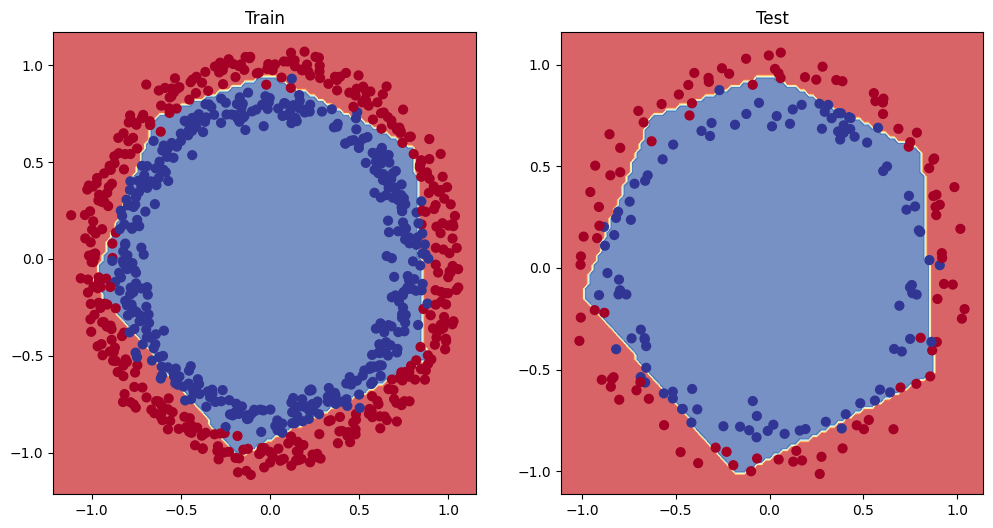

In [109]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # 1 row, 2 columns with 1st value is training plot
plt.title('Train')
plot_decision_boundary(model_8, X=X_train, y=y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_8, X=X_test, y=y_test)

plt.show()

### Using the TensorFlow History object to plot a model's loss curves

How did the performance change everytime the model had a chance to look at the data (once every epoch)?

We can check the **loss curves** (also referred to as the **learning curves**) from variable `history` when calling the `fit()` function on a model ([`fit()` returns a `History` object](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)).

In [110]:
# see this fit history by transfering it to a DataFrame
pd.DataFrame(model_8_fit_history.history)

accuracy      loss
0    0.45625  0.698924
1    0.49625  0.691930
2    0.51875  0.689592
3    0.52250  0.686425
4    0.57000  0.681927
5    0.57000  0.675730
6    0.57750  0.668675
7    0.58125  0.661372
8    0.59125  0.654692
9    0.60250  0.647493
10   0.60750  0.637612
11   0.62875  0.617661
12   0.73375  0.579643
13   0.76625  0.534894
14   0.85375  0.478823
15   0.88125  0.424292
16   0.88375  0.379355
17   0.90125  0.341734
18   0.90625  0.312984
19   0.91375  0.290863
20   0.91750  0.272493
21   0.92125  0.257709
22   0.92000  0.245986
23   0.91875  0.236018
24   0.91875  0.228814

Text(0.5, 1.0, 'Model 8 loss curves')

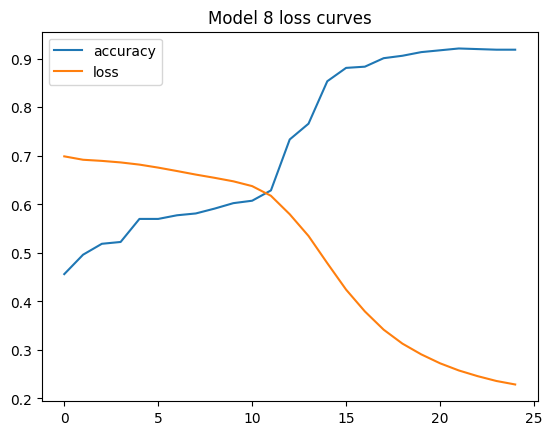

In [111]:
# Plot the los curves
pd.DataFrame(model_8_fit_history.history).plot()
plt.title('Model 8 loss curves')

🔑 Note: For many problems, the loss function going down means the moddel is improving (the predictions it's making are getting closer to the ground truth labels).

### Finding the best learning rate

Aside from the architecture itself (the layers, number of neurons, activations, etc), the modst important hyperparameter you can tune for neural network models is the learning rate.

In `model_8` we lowered the Adam optimizer's learning rate from the default of `0.001` (default) to `0.01`.

And you might be wondering why we did this. Put it this way, it was a lucky guess.

With practice, we will start to see what kind of hyperparameters work and what don't.

That's an important thing to understand about ML and deep learning in gerneral. I'ts very experimental. You build a model and evaluate it and repeat.

So here's a trick will help you find the optimal learning rate (at least to begin training with) for your models going forward.

We are going to use the following:
- A [learning rate **callback**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler).
  - It's a callback as an extra piece of functionality you can add to your model while it's training
- Another model (we can use the same ones as above, we're practicing building models here)
- A modified loss curves plot.

🔑 **Note:** The default hyperparameters of many neural network building blocks in TF are setup in a way which usually work right out of the box (e.g. the [Adam optimizer's](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam). So it's a good idea to try the default first, then adjust as needed.

In [112]:
# Let's create a new model
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# 2. Compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer='Adam', # use Adam optimizer with default learning rate (0.001)
                metrics=['accuracy'])

# 3. Create a learning rate scheduler callback
# Traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 4. Fit the model
model_9_fit_history = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5179 - loss: 0.6911 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5167 - loss: 0.6909 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5153 - loss: 0.6908 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5150 - loss: 0.6906 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5096 - loss: 0.6904 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5083 - loss: 0.6902 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5046 - loss: 0.6900 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5040 - loss: 0.6898 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5019 - loss: 0.6896 - learning_

<Axes: >

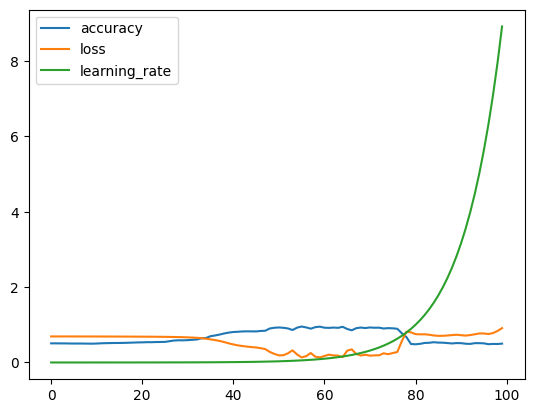

In [113]:
# Checkout the history
pd.DataFrame(model_9_fit_history.history).plot()

As you can see the learning rate exponentially increases as the number of epochs increases.

And the model's accuracy goes up (and loss goes down) at a specific point when the learning rate slowly increases.

To figure out where this infliction point is, we can plot the loss versus the log-scale learning rate

Text(0.5, 1.0, 'Learning rate vs. Loss')

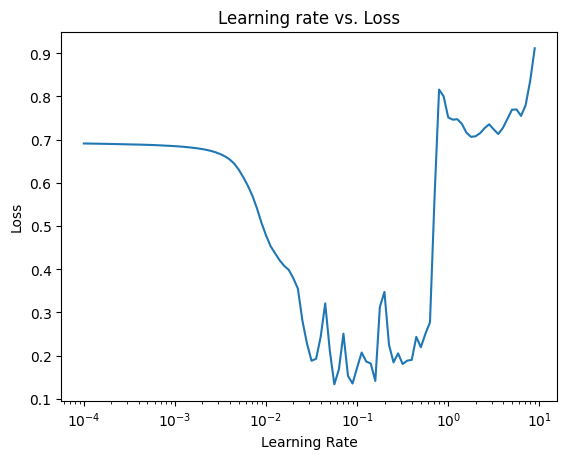

In [114]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20)) # 100 epochs, same formular as the learning rate scheduler
plt.semilogx(lrs, model_9_fit_history.history['loss']) # plot the learning rate to be logarithmic scale on x-axis
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss')

To figure out the ideal value of the learning rate (at least the ideal value to begin training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between `0.01` ($10^{-2}$) and `0.02`

![finding the ideal learning rate by plotting learning rate vs. loss](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-learning-rate-vs-loss.png)

*The ideal learning rate at the start of model training is somewhere just before the loss curve bottoms out (a value where the loss is still decreasing).*

In [115]:
# Examples of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 10**-4 # 10**-4 equals `1e-4`

(1, 0.1, 0.01, 0.001, 0.0001)

### Training and evaluating a model with an ideal learning rate

Now we've estimated the ideal learning rate (we'll use `0.02`) for our model, let's refit it.

In [116]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_10.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # set the learning rate to 0.02
                 metrics=['accuracy'])

# 3. Fit the model
model_10_fit_history = model_10.fit(X_train, y_train, epochs=20) # train for 20 epochs (5 less than before)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4491 - loss: 0.7086 
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5600 - loss: 0.6853
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5779 - loss: 0.6741
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6036 - loss: 0.6614
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6166 - loss: 0.6483
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6345 - loss: 0.6337
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6487 - loss: 0.6192
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7073 - loss: 0.5950 
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7430 - loss: 0.5682 
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7530 - loss: 0.5459 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7538 - loss: 0.5289 
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7645

In [117]:
# Evaluate the model
model_10.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7102 - loss: 0.5711


[0.5601345300674438, 0.7149999737739563]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step
doing binary classification...


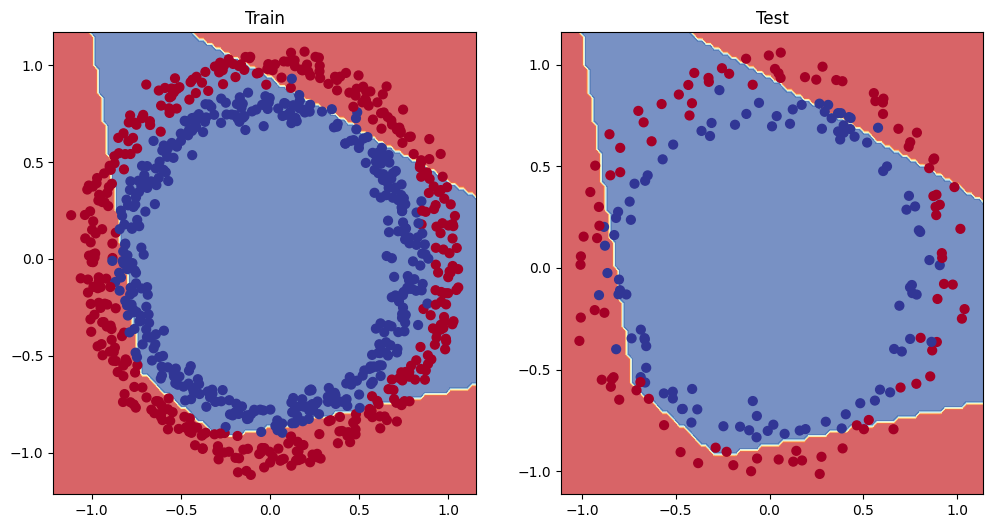

In [118]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

The accuracy of model_10 is slightly lower than model_8, training longer will improve it.

### More classification evaluation methods

Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

> 🔑 **Note:** Every classification problem will require different kinds of evaluation methods. But you should be familiar with at least the ones above.

#### Evaluate accuracy and loss

Let's start with accuracy.

Because we passed `["accuracy"]` to the `metrics` parameter when we compiled our model, calling `evaluate()` on it will return the loss as well as accuracy.

In [119]:
# Check the loss and accuracy of the model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7102 - loss: 0.5711 
Model loss on the test set: 0.5601345300674438
Model accuracy on the test set: 71.50%


#### Confusion matrix

In [120]:
# Make predictions
model_10_preds = model_10.predict(X_test)

# Check the first 10 predictions
model_10_preds[:10]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[0.7361625 ],
       [0.40010795],
       [0.7361625 ],
       [0.73547614],
       [0.55257696],
       [0.7361625 ],
       [0.29914525],
       [0.7361625 ],
       [0.64578927],
       [0.35001546]], dtype=float32)

In [121]:
# Check the first 10 labels
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

It looks like we need to get our predictions into the binary format (0 or 1).

But you might be wondering, what format are they currently in?

In their current format (`9.8526537e-01`), they're in a form called **prediction probabilities**.

You'll see this often with the outputs of neural networks. Often they won't be exact values but more a probability of how *likely* they are to be one value or another.

So one of the steps you'll often see after making predicitons with a neural network is converting the prediction probabilities into labels.

In our case, since our ground truth labels (`y_test`) are binary (0 or 1), we can convert the prediction probabilities using to their binary form using [`tf.round()`](https://www.tensorflow.org/api_docs/python/tf/math/round).

In [122]:
# Convert the predictions to binary and view the first 10
model_10_preds = tf.round(model_10_preds)

model_10_preds[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)>

In [123]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix


# Create confusion matrix
model_10_cm = confusion_matrix(y_test, tf.round(model_10_preds))

# View the confusion matrix
model_10_cm

array([[56, 44],
       [13, 87]])

#### Plotting our confusion matrix

##### Plotting confusion matrix by following the course

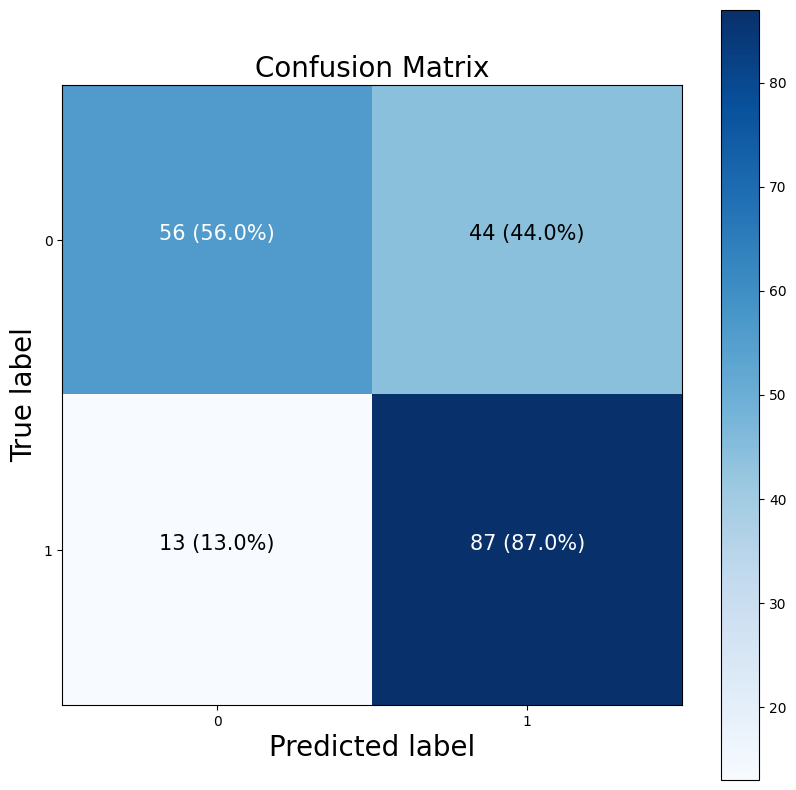

In [124]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm_norm = model_10_cm.astype("float") / model_10_cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = model_10_cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(model_10_cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(model_10_cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (model_10_cm.max() + model_10_cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(model_10_cm.shape[0]), range(model_10_cm.shape[1])):
  plt.text(j, i, f"{model_10_cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if model_10_cm[i, j] > threshold else "black",
           size=15)

##### Turning the plotting confusion matrix to a function

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=10, normalize=False):
    """
    Plots a confusion matrix using Matplotlib.

    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.
    classes (list): List of class names. If None, integer labels are used.
    figsize (tuple): Size of the figure.
    normalize (bool): Whether to normalize the confusion matrix.
    """
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    # Set up the figure
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set up the labels
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(cm.shape[0]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels,
           yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)" if normalize else f"{cm[i, j]}",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

    plt.show()

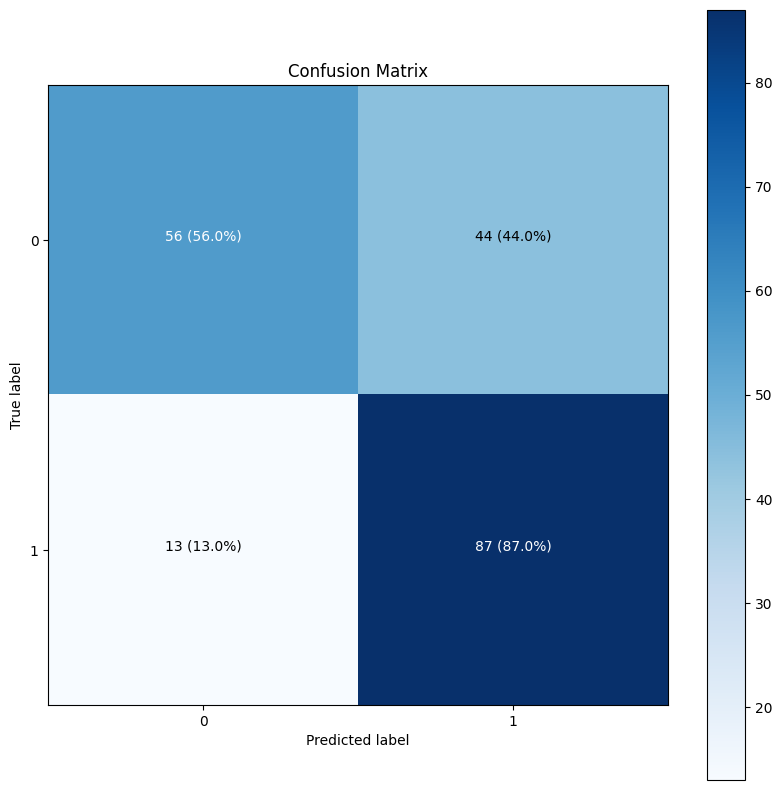

In [126]:
plot_confusion_matrix(y_test, tf.round(model_10_preds), classes=['0', '1'], normalize=True)

## Working with a larger example (multiclass classification)

We've seen a binary classification example (predicting if a data point is part of a red circle or blue circle) but what if you had multiple different classes of things?

For example, say you were a fashion company and you wanted to build a neural network to predict whether a piece of clothing was a shoe, a shirt or a jacket (3 different options).

When you have more than two classes as an option, this is known as **multiclass classification**.

The good news is, the things we've learned so far (with a few tweaks) can be applied to multiclass classification problems as well.

Let's see it in action.

To start, we'll need some data. The good thing for us is TensorFlow has a multiclass classication dataset known as [Fashion MNIST built-in](https://github.com/zalandoresearch/fashion-mnist). Meaning we can get started straight away.

We can import it using the [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) module.

> 📖 **Resource:** The following multiclass classification problem has been adapted from the [TensorFlow classification guide](https://www.tensorflow.org/tutorials/keras/classification). A good exercise would be to once you've gone through the following example, replicate the TensorFlow guide.

### Getting the Data

In [2]:
import tensorflow as tf

# The data has already been sorted into training and test sets for us
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

2024-11-22 08:44:17.338194: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-22 08:44:22.183676: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-22 08:44:23.897582: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-22 08:44:24.357232: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-22 08:44:27.763809: I tensorflow/core/platform/cpu_feature_guar

### Data Exploration

In [3]:
# Show the shape of the data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [5]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

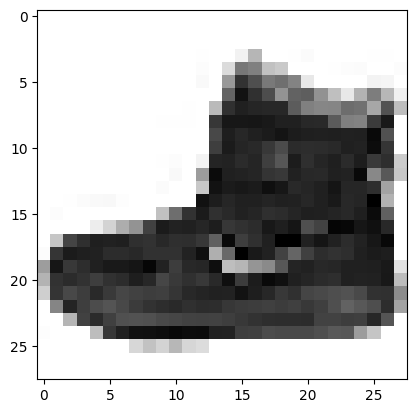

In [6]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0], cmap=plt.cm.binary)

In [7]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

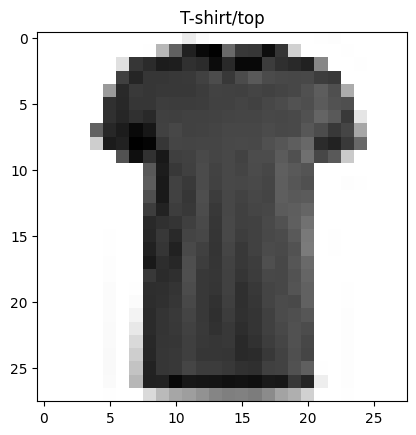

In [8]:
# Plot an example image and it's label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

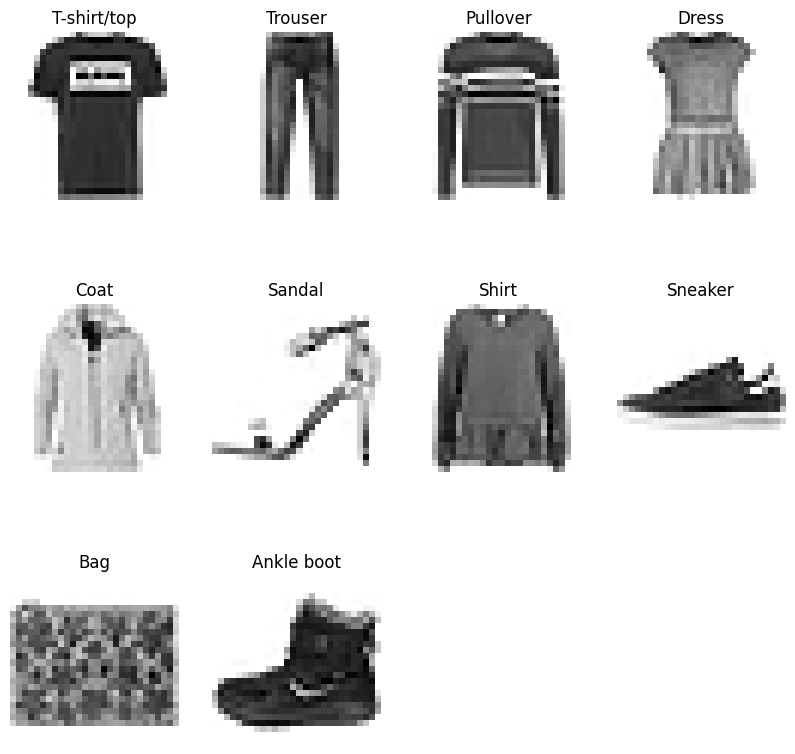

In [9]:
import numpy as np

# Plot all labels of fashion MNIST
def plot_all_labels(data, labels, class_names):
    """
    Plots one example of each label from the Fashion MNIST dataset.

    Parameters:
    data (np.ndarray): The image data.
    labels (np.ndarray): The labels corresponding to the image data.
    class_names (list): The list of class names.
    """
    plt.figure(figsize=(10, 10))
    unique_labels = np.unique(labels)
    for i, label in enumerate(unique_labels):
        ax = plt.subplot(3, 4, i + 1)
        idx = np.where(labels == label)[0][0]
        plt.imshow(data[idx], cmap=plt.cm.binary)
        plt.title(class_names[label])
        plt.axis(False)
    plt.show()

# Plot all 10 labels of Fashion MNIST
plot_all_labels(train_data, train_labels, class_names)

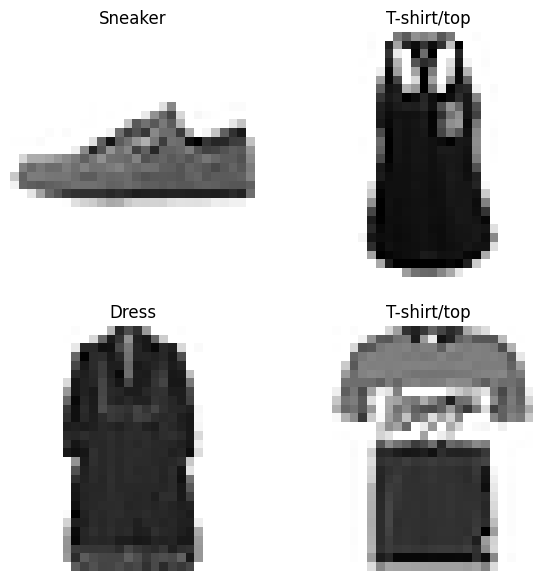

In [10]:
# Plot multiple random images of fashion MNIST
import random

plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

### Building our first multi-class classification model

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

* The **input shape** will have to deal with 28x28 tensors (the height and width of our images).
  * We're actually going to squash the input into a tensor (vector) of shape `(784)`.
* The **output shape** will have to be 10 because we need our model to predict for 10 different classes.
  * We'll also change the `activation` parameter of our output layer to be [`"softmax"`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) instead of `'sigmoid'`. As we'll see the `"softmax"` activation function outputs a series of values between 0 & 1 (the same shape as **output shape**, which together add up to ~1. The index with the highest value is predicted by the model to be the most *likely* class.
* We'll need to change our loss function from a binary loss function to a multiclass loss function.
  * More specifically, since our labels are in integer form, we'll use [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy), if our labels were one-hot encoded (e.g. they looked something like `[0, 0, 1, 0, 0...]`), we'd use [`tf.keras.losses.CategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy).
* We'll also use the `validation_data` parameter when calling the `fit()` function. This will give us an idea of how the model performs on the test set during training.

In [11]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to flatten our 28x28x1 data to 784x1)
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile the model
# different loss function for multiclass classifcation:
# CategoricalCrossentropy for one-hot endcoded labels
# SparseCategoricalCrossentropy for integer labels
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
model_11_fit_history = model_11.fit(
    train_data,
    train_labels,
    epochs=10,
    validation_data=(test_data, test_labels))

/mnt/d/Dev-Workspace/Python-workspace/tensorflow/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1732236316.639689    2128 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732236321.272732    2128 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732236321.272789    2128 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732236321.288567    2128 cuda_executor.cc:1001] could n

Epoch 1/10


I0000 00:00:1732236326.145273   16301 service.cc:146] XLA service 0x7f65f401d210 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732236326.145330   16301 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-11-22 08:45:26.543045: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-22 08:45:27.342049: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  65/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0964 - loss: 41.4690   

I0000 00:00:1732236328.983472   16301 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.0996 - loss: 5.0064 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0987 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0987 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accurac

### Check the model summary

In [12]:
model_11.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

Alright, our model gets to about ~35% accuracy after 10 epochs using a similar style model to what we used on our binary classification problem.

Which is better than guessing (guessing with 10 classes would result in about 10% accuracy) but we can do better.

Do you remember when we talked about neural networks preferring numbers between 0 and 1?

Well, right now, the data we have isn't between 0 and 1, in other words, it's not normalized. It's pixel values are between 0 and 255.

Let's see.

### Check the min and max values of the training data

In [13]:
train_data.min(), train_data.max()

(0, 255)

### Data scaling (normalization)

We can get these values between 0 and 1 by dividing the entire array by the maximum: `255.0` (dividing by a float also converts to a float).

Doing so will result in all of our data being between 0 and 1 (known as **scaling** or **normalization**).

In [14]:
# Divide train and test images by the maxium value (normalize it)
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the normalized train data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

### Building our 2nd multi-class classification model using normalized data

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to flatten our 28x28x1 data to 784x1)
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile the model
# different loss function for multiclass classifcation:
# CategoricalCrossentropy for one-hot endcoded labels
# SparseCategoricalCrossentropy for integer labels
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
model_12_fit_history = model_12.fit(
    train_data_norm,
    train_labels,
    epochs=10,
    validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5323 - loss: 1.3064 - val_accuracy: 0.7757 - val_loss: 0.6500
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7905 - loss: 0.6144 - val_accuracy: 0.7953 - val_loss: 0.5930
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8058 - loss: 0.5664 - val_accuracy: 0.8036 - val_loss: 0.5709
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8135 - loss: 0.5439 - val_accuracy: 0.8084 - val_loss: 0.5597
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8182 - loss: 0.5302 - val_accuracy: 0.8118 - val_loss: 0.5520
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8216 - loss: 0.5211 - val_accuracy: 0.8135 - val_loss: 0.5466
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8239 - loss: 0.5146 - val_accuracy: 0.8130 - val_loss: 0.5431
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8263 - loss: 0.5095 - 

We used the exact same model as before but with normalized data and now seeing a much higher accuracy value!

> 🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 to 1)

#### Plot the history of non-normalized/normalized data

<Axes: title={'center': 'Normalized Data'}>

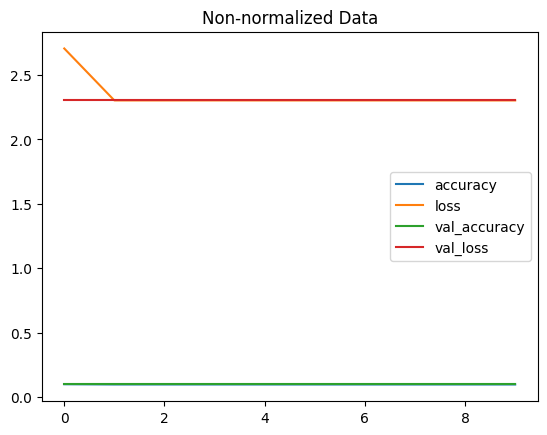

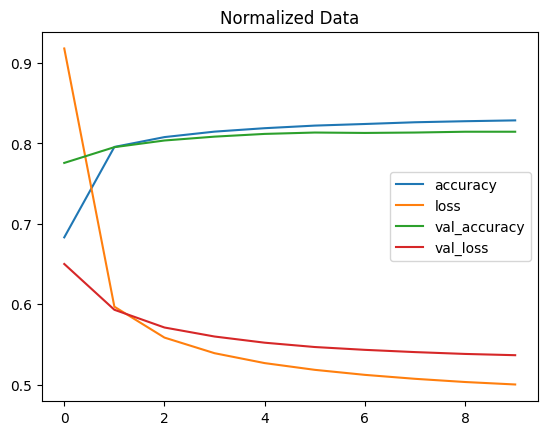

In [16]:
import pandas as pd

# Plot the non-normalized data training history
pd.DataFrame(model_11_fit_history.history).plot(title='Non-normalized Data')

# Plot the normalized data training history
pd.DataFrame(model_12_fit_history.history).plot(title='Normalized Data')

Wow. From these two plots, we can see how much quicker our model with the normalized data (`model_12`) improved than the model with the non-normalized data (`model_11`).

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

How about we find the ideal learning rate and see what happens?

We'll use the same architecture we've been using.

### Finding the ideal learning rate

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to flatten our 28x28x1 data to 784x1)
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile the model
# different loss function for multiclass classifcation:
# CategoricalCrossentropy for one-hot endcoded labels
# SparseCategoricalCrossentropy for integer labels
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Learning rate callback
learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
model_13_fit_history = model_13.fit(
    train_data_norm,
    train_labels,
    epochs=20, # train for 20 epochs
    validation_data=(test_data_norm, test_labels))

/mnt/d/Dev-Workspace/Python-workspace/tensorflow/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4165 - loss: 1.5392 - val_accuracy: 0.7158 - val_loss: 0.8214
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7181 - loss: 0.7934 - val_accuracy: 0.7378 - val_loss: 0.7345
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7387 - loss: 0.7278 - val_accuracy: 0.7521 - val_loss: 0.6999
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7537 - loss: 0.6925 - val_accuracy: 0.7612 - val_loss: 0.6757
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7621 - loss: 0.6667 - val_accuracy: 0.7680 - val_loss: 0.6571
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7690 - loss: 0.6466 - val_accuracy: 0.7717 - val_loss: 0.6433
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7742 - loss: 0.6313 - val_accuracy: 0.7737 - val_loss: 0.6335
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7776 - loss: 0.6204 - 

Text(0.5, 1.0, 'Learning rate vs. Loss')

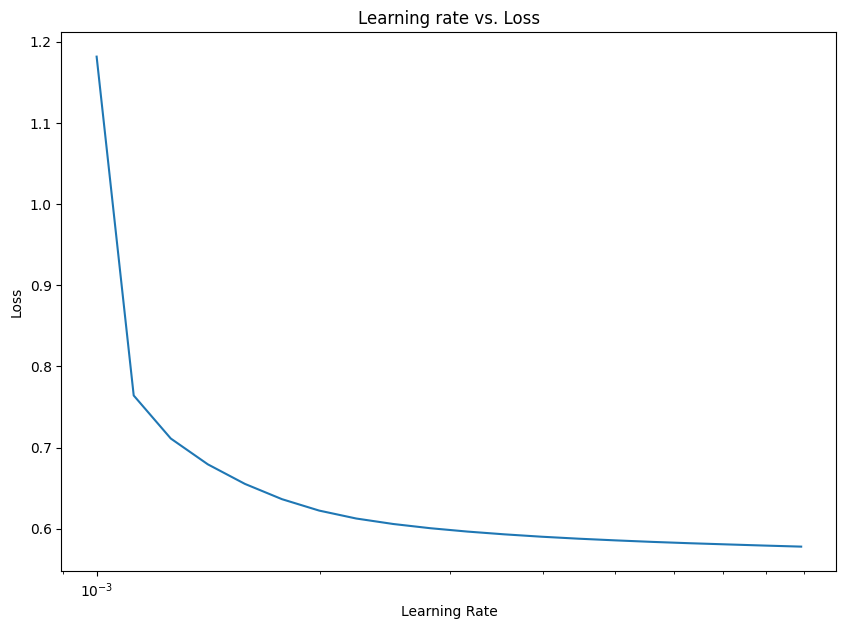

In [18]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (tf.range(20)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, model_13_fit_history.history['loss']) # plot the learning rate to be logarithmic scale on x-axis
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss')

### Refit the model with ideal learning rate

In this case, it looks like somewhere close to the default learning rate of the [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) (`0.001`) is the ideal learning rate.

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to flatten our 28x28x1 data to 784x1)
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=['accuracy'])

# Fit the model
model_14_fit_history = model_14.fit(
    train_data_norm,
    train_labels,
    epochs=20,
    validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5377 - loss: 1.3284 - val_accuracy: 0.7586 - val_loss: 0.6994
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7724 - loss: 0.6651 - val_accuracy: 0.7883 - val_loss: 0.6313
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7961 - loss: 0.6041 - val_accuracy: 0.7984 - val_loss: 0.6058
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8058 - loss: 0.5767 - val_accuracy: 0.8031 - val_loss: 0.5908
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8115 - loss: 0.5600 - val_accuracy: 0.8062 - val_loss: 0.5815
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8150 - loss: 0.5486 - val_accuracy: 0.8101 - val_loss: 0.5744
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8167 - loss: 0.5402 - val_accuracy: 0.8119 - val_loss: 0.5696
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8186 - loss: 0.5336 - 

### Evaluate the multi-class classification model with ideal learning rate

#### Creating a confusion matrix

In [20]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data_norm) # get predicted probabilities

# See the first 10 predictions
y_probs[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[9.85650583e-09, 8.56737870e-07, 4.38618343e-07, 4.80385916e-06,
        3.89526758e-05, 9.81258675e-02, 9.91598483e-08, 3.25150669e-01,
        1.63255748e-03, 5.75045705e-01],
       [3.02321423e-04, 1.37658001e-08, 8.18853021e-01, 3.25830001e-03,
        4.32493240e-02, 1.14066999e-23, 1.34336770e-01, 0.00000000e+00,
        3.15439792e-07, 2.96166788e-21],
       [1.07937492e-04, 9.99811709e-01, 2.27184997e-13, 8.03498406e-05,
        4.37427481e-08, 4.00061650e-11, 1.72753243e-08, 4.18801178e-31,
        1.26597905e-08, 8.75307204e-09],
       [1.28988040e-05, 9.98680174e-01, 3.23832823e-12, 1.29311974e-03,
        2.77572259e-08, 9.07224729e-12, 3.15619353e-09, 1.81821607e-26,
        2.13212670e-10, 1.38569903e-05],
       [2.93418497e-01, 1.26226572e-03, 4.46044430e-02, 7.63530433e-02,
        3.34698372e-02, 1.01495985e-10, 5.50193667e-01, 2.86553358e-27,
        6.98249671e-04, 3.87048379e-12],
       [2.47166418e-02, 9.71930742e-01, 2.76654322e-09, 3.25644808e-03,
   

Our model outputs a list of **prediction probabilities**, meaning, it outputs a number for how likely it thinks a particular class is to be the label.

The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.

To find the highest value we can use the [`argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) method.

In [21]:
# See the predicted class number and label
first_pred = y_probs[0].argmax(), 

first_pred, class_names[first_pred[0]]

((9,), 'Ankle boot')

In [22]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [23]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(test_labels, y_preds)
cm

array([[757,   6,  14,  70,   8,   7, 127,   0,  11,   0],
       [  3, 937,   9,  40,   4,   0,   5,   0,   0,   2],
       [ 14,   1, 701,  24, 150,   0, 104,   0,   6,   0],
       [ 26,  15,  29, 830,  40,   3,  49,   0,   5,   3],
       [  1,   0, 105,  44, 747,   0,  83,   0,  20,   0],
       [  0,   0,   0,   1,   0, 903,   0,  66,   1,  29],
       [114,   3, 126,  61, 133,   7, 537,   0,  19,   0],
       [  0,   0,   0,   0,   0,  30,   0, 946,   0,  24],
       [  5,   0,   5,   4,  17,  24,  30,   4, 908,   3],
       [  0,   0,   0,   1,   0,  24,   0,  72,   1, 902]])

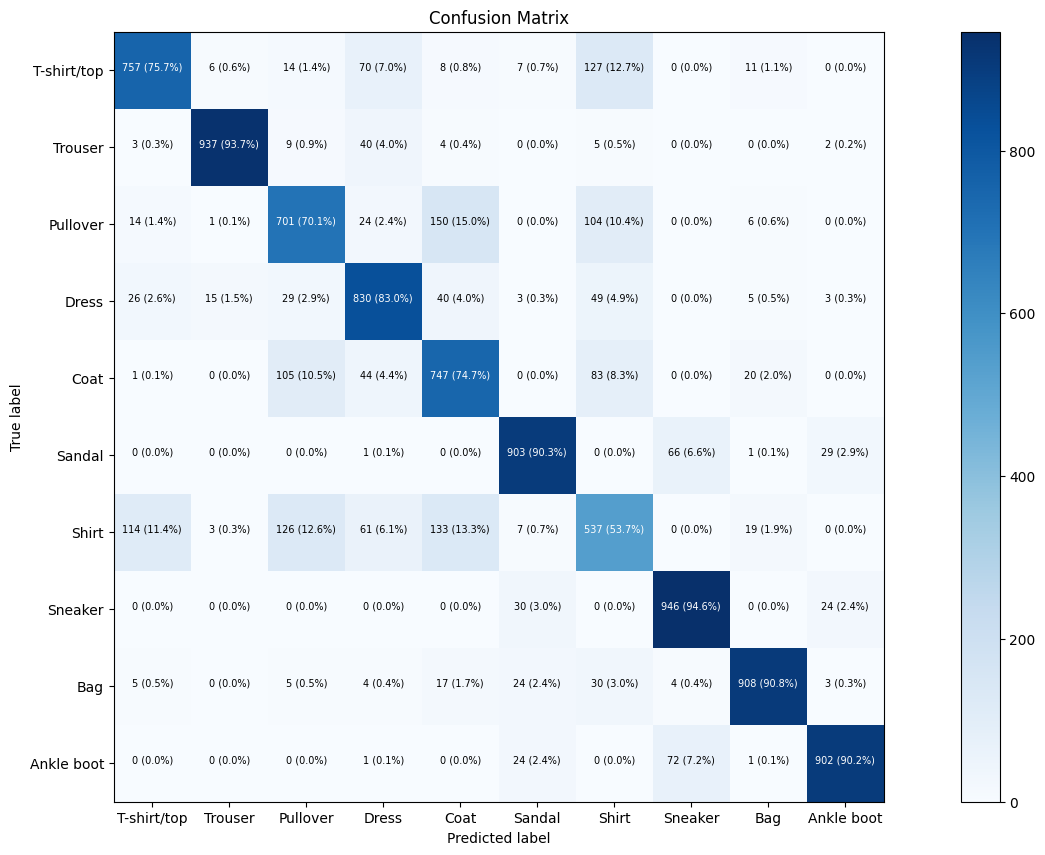

In [24]:
# Plot the prettier confusion matrix
plot_confusion_matrix(test_labels, y_preds, class_names, figsize=(20, 10), text_size=7, normalize=True)

#### Plot random images alone with it's prediction

That looks much better! (one of my favourites sights in the world is a confusion matrix with dark squares down the diagonal)

Except the results aren't as good as they could be...

It looks like our model is getting confused between the `Shirt` and `T-shirt/top` classes (e.g. predicting `Shirt` when it's actually a `T-shirt/top`).

> 🤔 **Question:** Does it make sense that our model is getting confused between the `Shirt` and `T-shirt/top` classes? Why do you think this might be? What's one way you could investigate?

We've seen how our models predictions line up to the truth labels using a confusion matrix, but how about we visualize some?

Let's create a function to plot a random image along with its prediction.

> 🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

In [93]:
import random

# Create a function to view a random image and its prediction
def plot_random_image(model, images, true_labels, classes, index: int = None):
    """
    Picks a random image, plots it and labels it with a prediction and truth label.
    
    Args:
      model: a trained model (trained on data similar to what's in images).
      images: a set of random images (in tensor form).
      true_labels: array of true labels for images.
      classes: array of class names for images.

    Returns:
      A plot of a random image from `images` with a predicted class label from `model` and true class label.      
    """
    # Set up random integer or set index
    if index is None:
        i = random.randint(0, len(images))
    else:
        i = index
    
    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
    
    # Add xlabel information (prediction/true label)
    plt.xlabel(
        "{} {:2.0f}% (True: {})".
            format(pred_label, 100*tf.reduce_max(pred_probs), true_label),
        color=color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


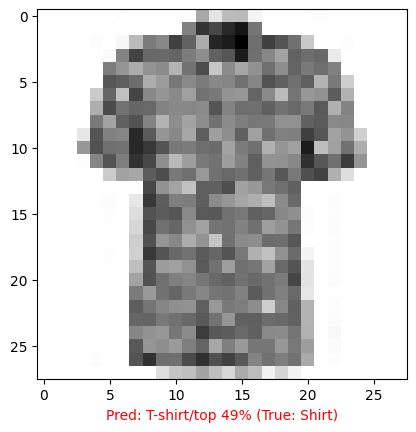

In [ ]:
# Checkout a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data_norm, 
                  true_labels=test_labels, 
                  classes=class_names)

### What "patterns" is our model learning?

We've been talking a lot about how a neural network finds patterns in numbers, but what exactly do these patterns look like?

Let's crack open one of our models and find out.

First, we'll get a list of layers in our most recent model (`model_14`) using the `layers` attribute.

In [27]:
# Find the layers of our most recent model
model_14.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [28]:
# Extract a particular layer
model_14.layers[1]

<Dense name=dense_9, built=True>

And we can find the patterns learned by a particular layer using the `get_weights()` method.

The `get_weights()` method returns the **weights** (also known as a weights matrix) and biases (also known as a bias vector) of a particular layer.

In [29]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[ 0.22373326,  0.13024285, -0.7923394 ,  0.30209124],
        [-0.10553196, -0.18297186, -0.39710143,  0.31132114],
        [-1.2723238 ,  1.1630001 , -1.1254623 , -0.37679178],
        ...,
        [-0.3034223 , -0.19683468, -0.15860623, -0.19463584],
        [-0.1715985 , -0.16008027,  0.04465182, -0.43238673],
        [-0.16490231,  1.3458728 , -0.744875  ,  0.07224347]],
       dtype=float32),
 (784, 4))

The weights matrix is the same shape as the input data, which in our case is 784 (28x28 pixels). And there's a copy of the weights matrix for each neuron the in the selected layer (our selected layer has 4 neurons).

Each value in the weights matrix corresponds to how a particular value in the input data influences the network's decisions.

These values start out as random numbers (they're set by the [`kernel_initializer` parameter](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) when creating a layer, the default is [`"glorot_uniform"`](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotUniform)) and are then updated to better representative values of the data (non-random) by the neural network during training.

![neural network supervised learning weight updates](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-fashion-mnist-learning.png)
*Example workflow of how a supervised neural network starts with random weights and updates them to better represent the data by looking at examples of ideal outputs.*

Now let's check out the bias vector.

In [30]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([0.18462968, 0.10554084, 0.16352013, 0.33244005], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the [`bias_initializer` parameter](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [31]:
# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

Now we've built a few deep learning models, it's a good time to point out the whole concept of inputs and outputs not only relates to a model as a whole but to *every* layer within a model.

You might've already guessed this, but starting from the input layer, each subsequent layer's input is the output of the previous layer.

We can see this clearly using the utility [`plot_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model).

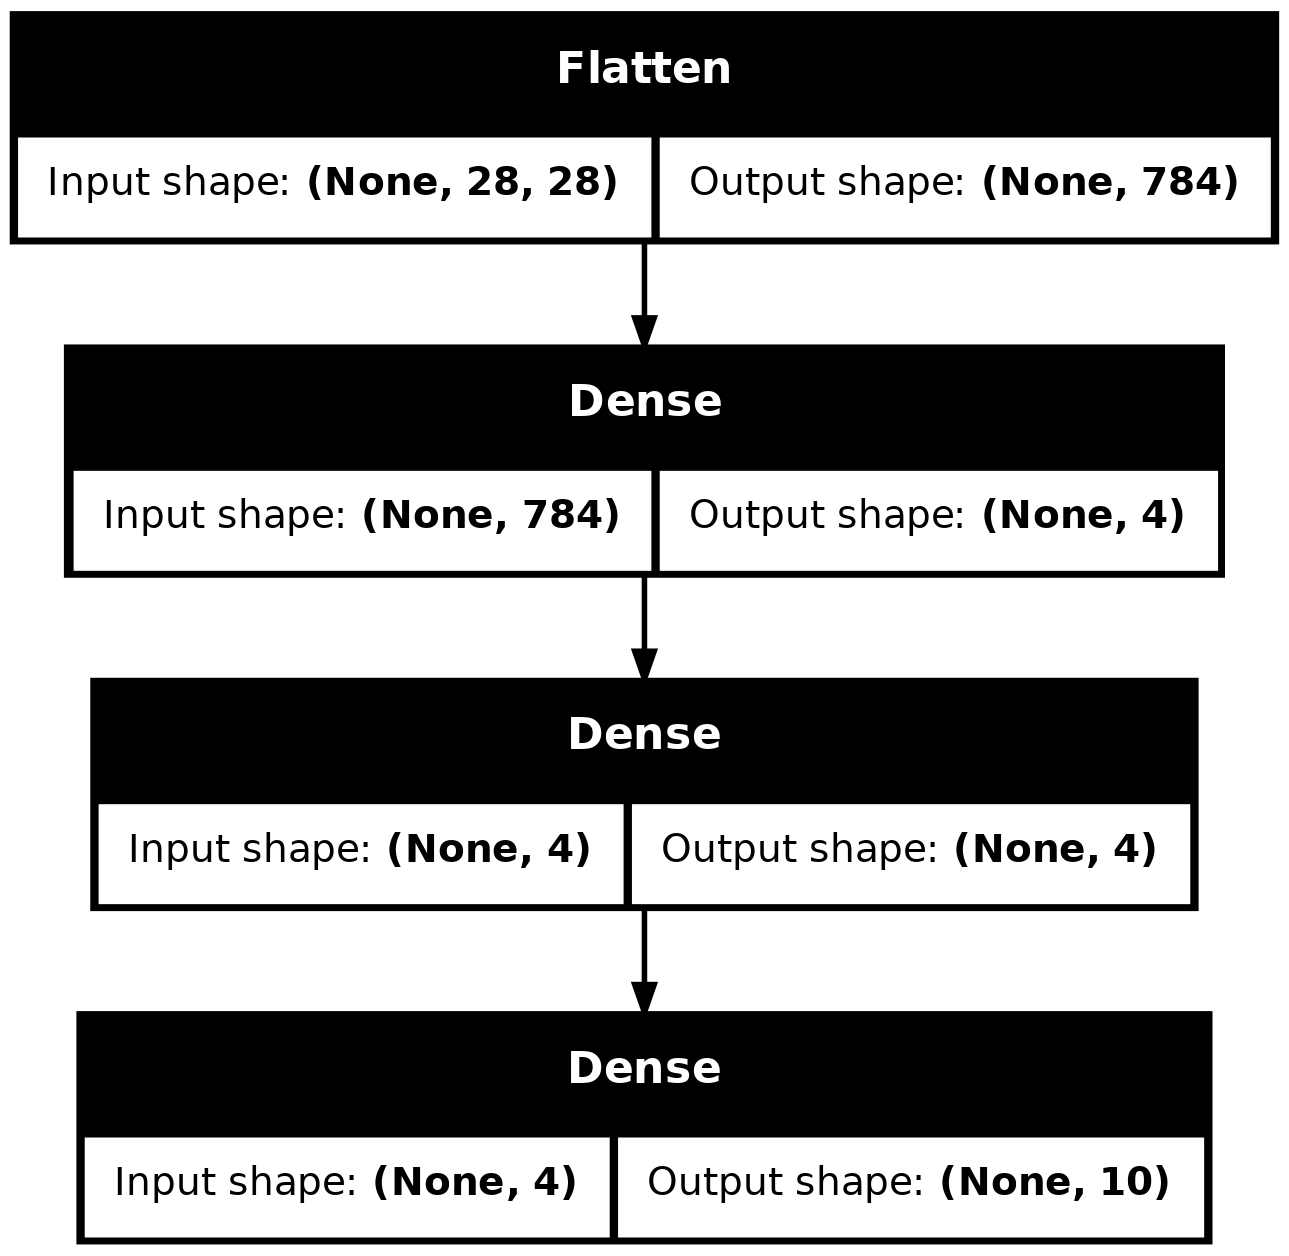

In [33]:
# See the inputs and outputs of each layer
tf.keras.utils.plot_model(model_14, show_shapes=True)

## How a model learns (in brief)

Alright, we've trained a bunch of models, but we've never really discussed what's going on under the hood. So how exactly does a model learn?

A model learns by updating and improving its weight matrices and biases values every epoch (in our case, when we call the `fit()` fucntion).

It does so by comparing the patterns its learned between the data and labels to the actual labels.

If the current patterns (weight matrices and bias values) don't result in a desirable decrease in the loss function (higher loss means worse predictions), the optimizer tries to steer the model to update its patterns in the right way (using the real labels as a reference).

This process of using the real labels as a reference to improve the model's predictions is called [**backpropagation**](https://en.wikipedia.org/wiki/Backpropagation).

In other words, data and labels pass through a model (**forward pass**) and it attempts to learn the relationship between the data and labels.

And if this learned relationship isn't close to the actual relationship or it could be improved, the model does so by going back through itself (**backward pass**) and tweaking its weights matrices and bias values to better represent the data.


## Practice: Train a model to get better accuracy on the fashion MNIST test set.

### Load the data

In [57]:
import tensorflow as tf

# The data has already been sorted into training and test sets for us
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [58]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

### Normalize data

In [59]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the normalized train data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

### Build our model

In [60]:
# Set random seed
tf.random.set_seed(42)

# Create the model using the parameters from tutorial
model_15 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_15.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(), # ideal learning rate (same as default)
                 metrics=['accuracy'])

# Fit the model
model_15_fit_history = model_15.fit(
    train_data_norm,
    train_labels,
    epochs=20, # Train for a bit longer
    validation_data=(test_data_norm, test_labels))

/mnt/d/Dev-Workspace/Python-workspace/tensorflow/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7795 - loss: 0.6324 - val_accuracy: 0.8436 - val_loss: 0.4269
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8613 - loss: 0.3888 - val_accuracy: 0.8625 - val_loss: 0.3762
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8756 - loss: 0.3420 - val_accuracy: 0.8626 - val_loss: 0.3714
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8839 - loss: 0.3154 - val_accuracy: 0.8690 - val_loss: 0.3624
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8905 - loss: 0.2965 - val_accuracy: 0.8684 - val_loss: 0.3629
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8955 - loss: 0.2815 - val_accuracy: 0.8703 - val_loss: 0.3579
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8999 - loss: 0.2680 - val_accuracy: 0.8706 - val_loss: 0.3682
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9036 - loss: 0.2579 - 

### Evaluate our model

In [61]:
test_loss, test_accuracy = model_15.evaluate(test_data_norm, test_labels)

test_loss, test_accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8731 - loss: 0.4285


(0.4264504015445709, 0.8761000037193298)

### Creating a confusion matrix

In [62]:
# Make predictions with the most recent model
y_probs = model_15.predict(test_data_norm) # get predicted probabilities

# See the first 10 predictions
y_probs[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.42839798e-12, 2.42350695e-15, 6.54682146e-13, 4.42263922e-14,
        2.32791706e-16, 8.28698467e-05, 1.73075079e-11, 1.09156698e-03,
        1.81606669e-13, 9.98825610e-01],
       [9.35606513e-05, 4.27824199e-17, 9.99621034e-01, 3.57606458e-17,
        2.83762696e-04, 2.91084496e-12, 1.63213122e-06, 9.82794792e-17,
        9.38086276e-17, 4.08916736e-18],
       [2.12199668e-15, 1.00000000e+00, 7.07087326e-19, 1.11490898e-14,
        3.54598247e-16, 6.24062007e-26, 1.16113477e-17, 3.98526748e-34,
        3.88802640e-24, 2.90068782e-43],
       [3.22960894e-08, 9.99999881e-01, 1.91447617e-12, 9.89870372e-08,
        3.29230176e-12, 5.65364765e-20, 3.36171285e-10, 1.93074369e-23,
        9.09318820e-18, 5.70293494e-32],
       [2.24587053e-01, 1.40729850e-11, 7.14639667e-03, 2.04690477e-05,
        1.10472256e-05, 1.54911197e-06, 7.68233478e-01, 4.50949000e-12,
        3.53031243e-10, 1.19568591e-10],
       [1.98827391e-12, 1.00000000e+00, 2.88384496e-14, 2.20119858e-14,
   

In [63]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [64]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(test_labels, y_preds)
cm

array([[856,   1,  19,  25,   5,   0,  91,   0,   3,   0],
       [  7, 970,   4,  10,   3,   1,   4,   0,   1,   0],
       [ 23,   1, 840,  13,  81,   1,  41,   0,   0,   0],
       [ 18,  10,  10, 902,  39,   1,  18,   0,   1,   1],
       [  0,   0, 135,  35, 801,   1,  28,   0,   0,   0],
       [  0,   0,   0,   1,   0, 950,   0,  29,   1,  19],
       [145,   0, 129,  31,  88,   0, 600,   0,   7,   0],
       [  0,   0,   0,   0,   0,   9,   0, 977,   0,  14],
       [ 10,   0,   7,   6,   3,   3,   7,   6, 958,   0],
       [  0,   0,   0,   0,   0,  12,   1,  80,   0, 907]])

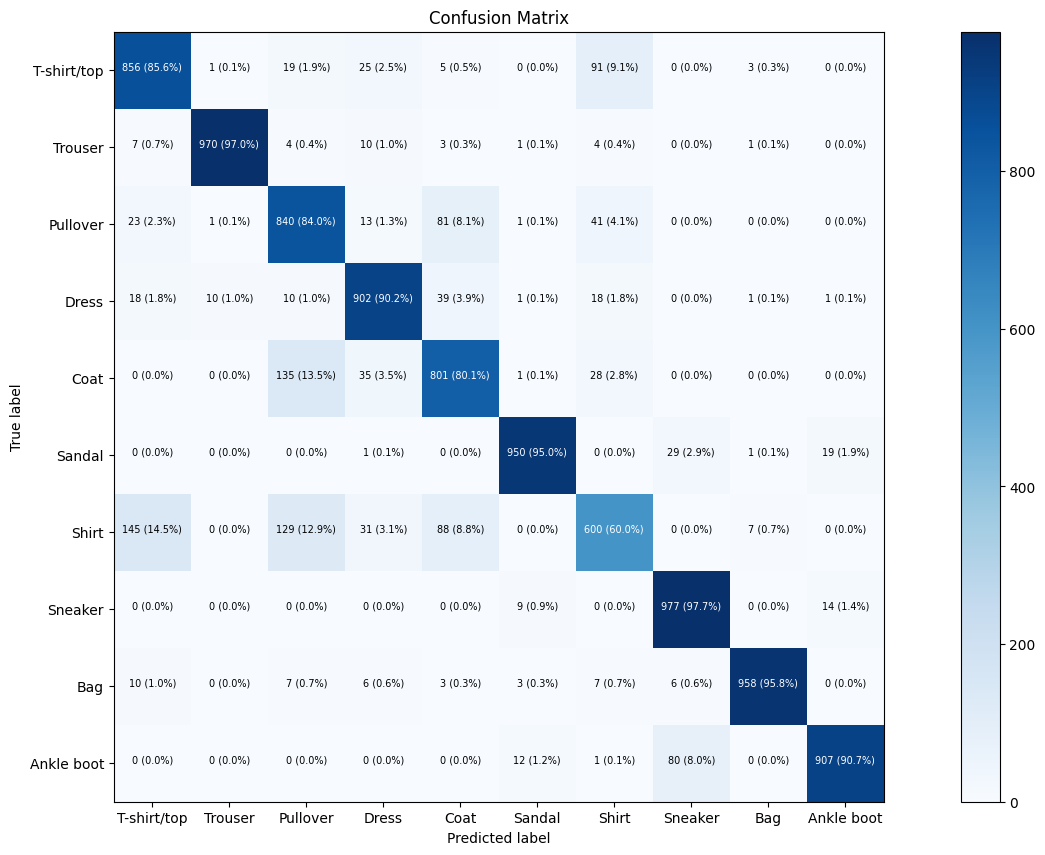

In [65]:
# Plot the prettier confusion matrix
plot_confusion_matrix(test_labels, y_preds, class_names, figsize=(20, 10), text_size=7, normalize=True)

### Verify predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


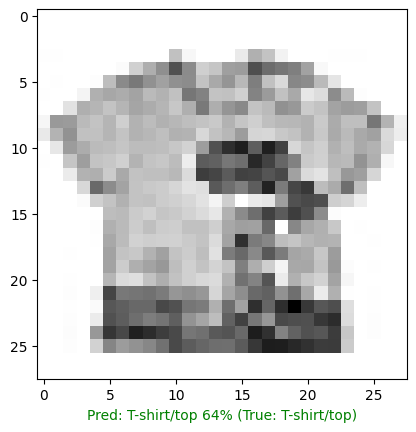

In [78]:
# Checkout a random image as well as its prediction
plot_random_image(model=model_15, 
                  images=test_data_norm, 
                  true_labels=test_labels, 
                  classes=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


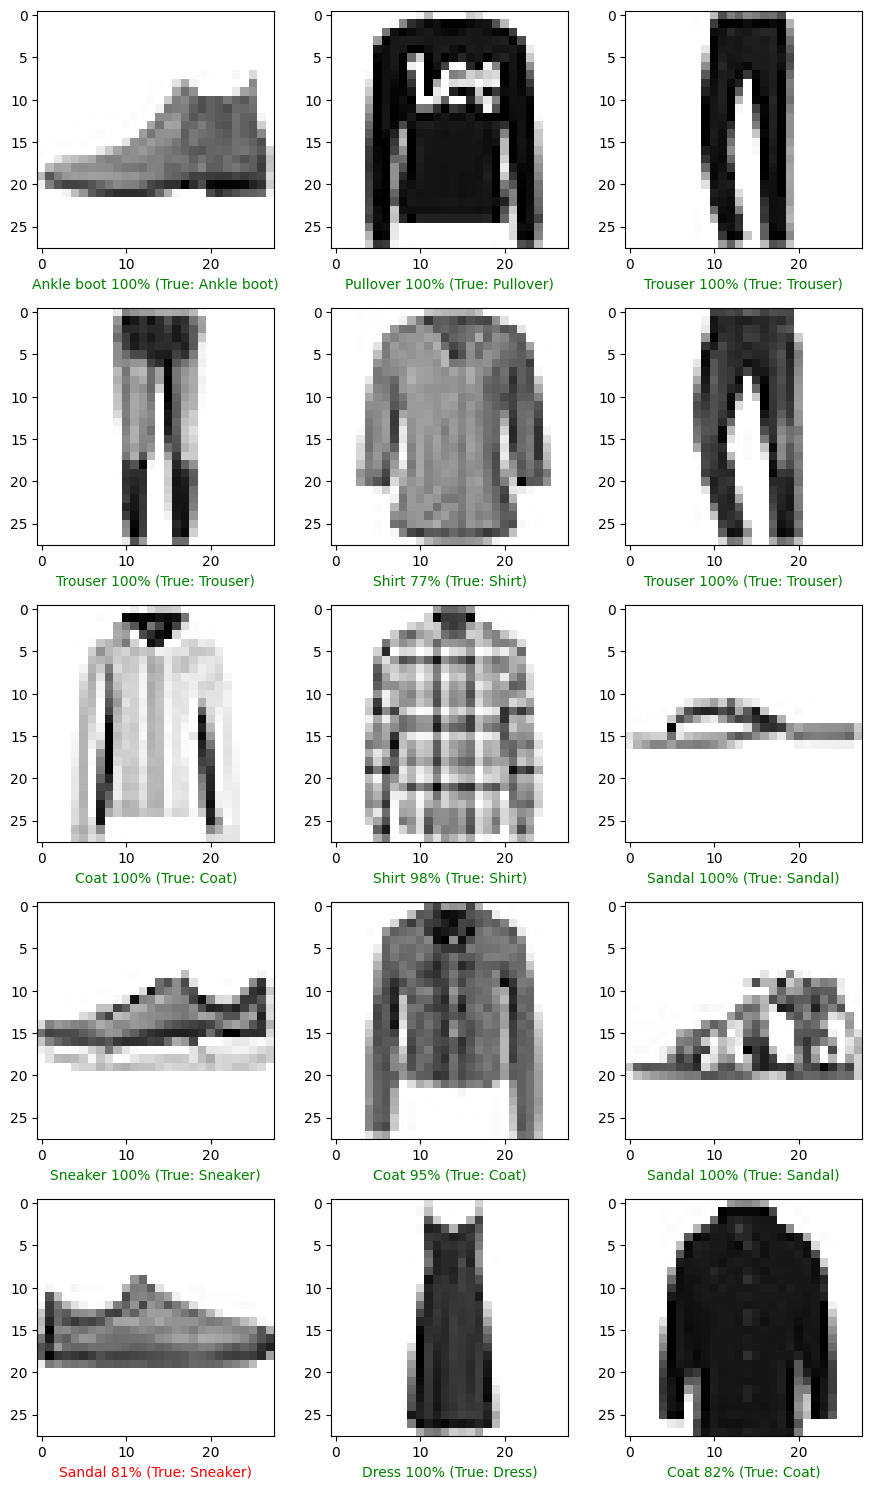

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in green and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(3*num_cols, 3*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plot_random_image(model_15, test_data_norm, test_labels, class_names, index=i)
plt.tight_layout()
plt.show()
